# Laboratorium 1


### Konfiguracja

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [4]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


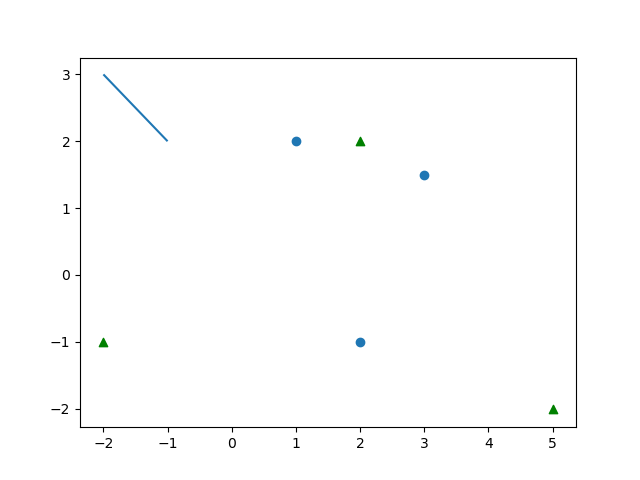

In [17]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

[1, 2]

<IPython.core.display.Javascript object>


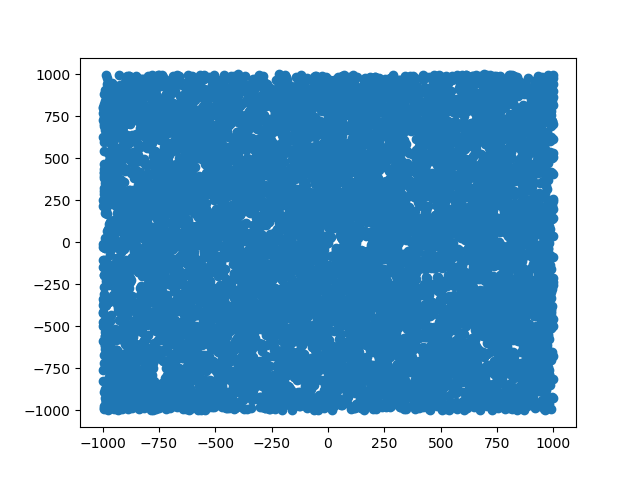

In [22]:
#a
%matplotlib notebook
import random

Points = []
for x in range(10000):
    Points.append((random.uniform(-1000,1000),random.uniform(-1000, 1000)))
    
plot = Plot([PointsCollection(Points)])
plot.draw()

<IPython.core.display.Javascript object>


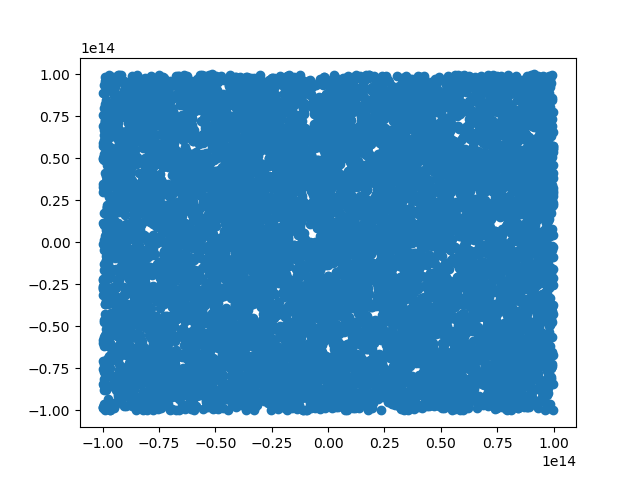

In [23]:
#b
%matplotlib notebook
import random

Points10k = []
for x in range(10000):
    Points.append((random.uniform(-1e14,1e14),random.uniform(-1e14, 1e14)))
    
plot = Plot([PointsCollection(Points)])
plot.draw()

<IPython.core.display.Javascript object>


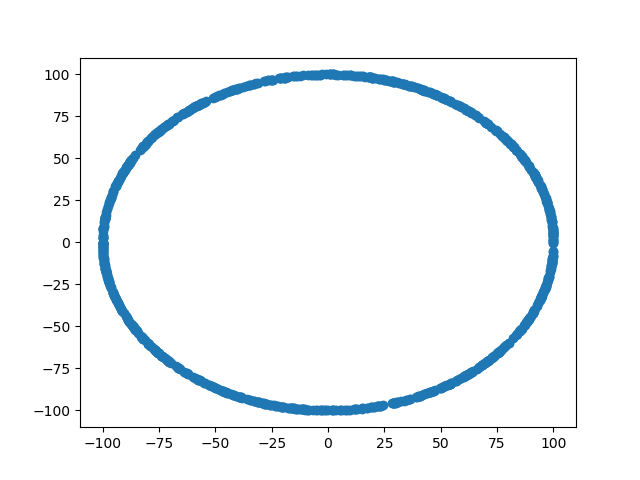

In [35]:
#c
%matplotlib notebook

Circle = []


    
for x in range(1000):
    t = random.uniform(0, 2*math.pi)
    Circle.append(( 100*math.cos(t), 100*math.sin(t) ))
    
plot = Plot([PointsCollection(Circle)])
plot.draw()

<IPython.core.display.Javascript object>


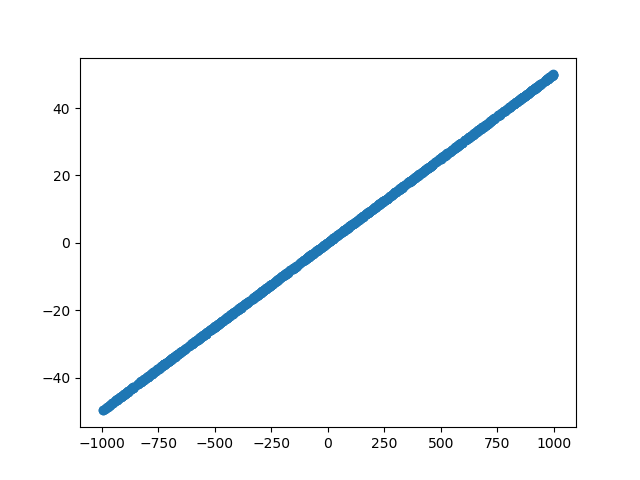

In [38]:
#d
%matplotlib notebook

Line = []

for i in range(1000):
    x = random.uniform(-1000, 1000)
    Line.append((x, 0.05*x+0.05))

    
plot = Plot([PointsCollection(Line)])
plot.draw()


In [61]:
#3
a_x = -1.0
a_y = 0.0
b_x = 1.0
b_y = 0.1

left1 = []
right1 = []
inline1 = []

left2 = []
right2 = []
inline2 = []

for p in Points:
    c = np.array([[a_x, a_y, 1],
                 [b_x, b_y, 1],
                 [p[0], p[1], 1]])
    det = np.linalg.det(c)
    if det < 1e-2:
        right1.append(p)
    elif det > 1e2:
        left1.append(p)
    else:
        inline1.append(p)
        
for p in Points:
    c = np.array([[a_x-p[0], a_y-p[1]], 
                  [b_x-p[0], b_y-p[1]]])
    
    det = np.linalg.det(c)
    if det < 1e-2:
        right2.append(p)
    elif det > 1e2:
        left2.append(p)
    else:
        inline2.append(p)

        
print("Left_1: ", len(left1), "  ", len(left2), "  Left_2")
print("Right_1: ", len(right), "  ", len(right2), "  Right_2")
print("Inline_1: ", len(inline), "  ", len(inline2), "  Inline2")


Left_1:  4968    4968   Left_2
Right_1:  10064    5032   Right_2
Inline_1:  0    0   Inline2
